In [50]:
# Basic Libraries
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from IPython.display import display_html 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [51]:
nbaData = pd.read_csv("all_seasons.csv")
nbaData

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21


In [52]:
all_seasons = []
    
for season in range(1996, 2000):
    if season + 1 - 1900 == 100:
        year = f"{season}-{'00'}"
    else:
        year = f'{season}-{season+1 - 1900}'
    all_seasons.append(nbaData[nbaData['season'] == year])
for season in range(2000, 2021):
    if season + 1 - 2000 < 10:
        year = f"{season}-{'0' + str(season+1-2000)}"
    else: 
        year = f'{season}-{season+1 - 2000}'
    all_seasons.append(nbaData[nbaData['season'] == year])

In [53]:

# Main
cleanSeasons = [] 

for i in range(len(all_seasons)):
    season = all_seasons[i]
    maxGamesPlayedID = season['gp'].idxmax()
    maxGamesPlayed = season.loc[maxGamesPlayedID]
    maxGames = maxGamesPlayed['gp']
    print(maxGames)

    if (maxGames >= 82):
        maxGames = 58
    else:
        maxGames *= 0.7
    print(f"maxGame filter {maxGames}")
    
    mySeason = season[season['gp'] >= round(maxGames)]
    cleanSeasons.append(mySeason)

83
maxGame filter 58
82
maxGame filter 58
50
maxGame filter 35.0
85
maxGame filter 58
83
maxGame filter 58
83
maxGame filter 58
83
maxGame filter 58
85
maxGame filter 58
84
maxGame filter 58
82
maxGame filter 58
82
maxGame filter 58
82
maxGame filter 58
82
maxGame filter 58
82
maxGame filter 58
83
maxGame filter 58
66
maxGame filter 46.199999999999996
82
maxGame filter 58
83
maxGame filter 58
83
maxGame filter 58
82
maxGame filter 58
82
maxGame filter 58
82
maxGame filter 58
82
maxGame filter 58
74
maxGame filter 51.8
72
maxGame filter 50.4


In [54]:
cleanNBA = pd.concat(cleanSeasons)

In [63]:

season = cleanNBA[cleanNBA['season']=='2000-01']

#getting best and worst player
bestScorerID = season['pts'].idxmax()
bestScorer = season.loc[bestScorerID]
worstScorerID = season['pts'].idxmin()
worstScorer = season.loc[worstScorerID]


bestScorer = pd.DataFrame((cleanNBA.loc[season['pts'].idxmax()]))
worstScorer = pd.DataFrame((cleanNBA.loc[season['pts'].idxmin()]))


In [64]:
df1 = bestScorer
df2 = worstScorer

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:200px;margin-left:150px;'")
df2_style = df2.style.set_table_attributes("style='display:inline;'")
#print("------------------------------------------------------ Season " +season.loc[0]['season'] + " ------------------------------------------------------")
print("")
print("                            Best PPG                                          Worst PPG")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


                            Best PPG                                          Worst PPG


,2021
Unnamed: 0,2021
player_name,Allen Iverson
team_abbreviation,PHI
age,26.000000
player_height,182.880000
player_weight,74.842680
college,Georgetown
country,USA
draft_year,1996
draft_round,1


In [65]:
#For entire seasons
points = pd.DataFrame(cleanNBA['pts'])
age = pd.DataFrame(cleanNBA['age'])
net_rating = pd.DataFrame(cleanNBA['net_rating'])
usage_rate = pd.DataFrame(cleanNBA['usg_pct'])
games_played = pd.DataFrame(cleanNBA['gp'])

# ----------------------------------------------AGE----------------------------------------------------------

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
points_train, points_test, age_train, age_test = train_test_split(points, age, test_size=0.25)
#print("Train Set :", points_train.shape, age_train.shape)
#print("Test Set  :", points_test.shape, age_test.shape)

linreg = LinearRegression()
linreg.fit(age_train, points_train)

LinearRegression()

In [19]:
print('Intercept \t: a = ', linreg.coef_)
print('Coefficients \t: b = ', linreg.intercept_)

Intercept 	: a =  [[-0.0741392]]
Coefficients 	: b =  [12.82679843]


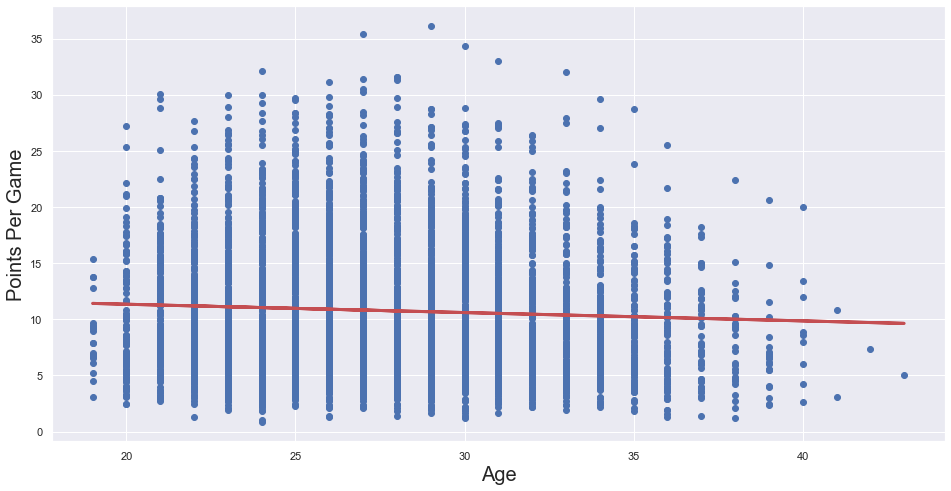

In [20]:
regline_x = age_train
regline_y = linreg.intercept_ + linreg.coef_ * age_train

f = plt.figure(figsize=(16, 8))
plt.scatter(age_train, points_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()

In [21]:
points_test_pred = linreg.predict(age_test)
print("Explained Variance for the train dataset (R^2):", linreg.score(age_train, points_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseTest = mean_sq_err(points_test, points_test_pred)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

Explained Variance for the train dataset (R^2): 0.003024901703133298
Root Mean Squared Error for test dataset (RMSE): 5.837020578698493


# --------------------------------------------------Usage Rate--------------------------------------------

In [ ]:
points_train2, points_test2, usgrate_train, usgrate_test = train_test_split(points, usage_rate, test_size=0.25)
print("Train Set :", points_train2.shape, usgrate_train.shape)
print("Test Set  :", points_test2.shape, usgrate_test.shape)

In [ ]:
linreg2 = LinearRegression()
linreg2.fit(usgrate_train, points_train2)

In [ ]:
print('Intercept \t: a = ', linreg2.coef_)
print('Coefficients \t: b = ', linreg2.intercept_)

In [ ]:
regline_x2 = usgrate_train
regline_y2 = linreg2.intercept_ + linreg2.coef_ * usgrate_train

f = plt.figure(figsize=(16, 8))
plt.scatter(usgrate_train, points_train2)
plt.plot(regline_x2, regline_y2, 'r-', linewidth = 3)
plt.xlabel('Usage Rate', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()

In [ ]:
points_test_pred2 = linreg2.predict(usgrate_test)
print("Explained Variance for the train dataset (R^2):", linreg2.score(usgrate_train, points_train2))
mseTest = mean_sq_err(points_test2, points_test_pred2)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

# --------------------------------------------Net Rating----------------------------------------------------

In [ ]:
points_train3, points_test3, netRating_train, netRating_test = train_test_split(points, net_rating, test_size=0.25)
print("Train Set :", points_train3.shape, netRating_train.shape)
print("Test Set  :", points_test3.shape, netRating_test.shape)

In [ ]:
linreg3 = LinearRegression()
linreg3.fit(netRating_train, points_train3)

In [ ]:
print('Intercept \t: a = ', linreg3.coef_)
print('Coefficients \t: b = ', linreg3.intercept_)

In [ ]:
regline_x3 = netRating_train
regline_y3 = linreg3.intercept_ + linreg3.coef_ * netRating_train

f = plt.figure(figsize=(16, 8))
plt.scatter(netRating_train, points_train3)
plt.plot(regline_x3, regline_y3, 'r-', linewidth = 3)
plt.xlabel('Net Rating', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()

In [ ]:
points_test_pred3 = linreg3.predict(netRating_test)
print("Explained Variance for the train dataset (R^2):", linreg3.score(netRating_train, points_train3))
mseTest = mean_sq_err(points_test3, points_test_pred3)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

In [ ]:
# GP

In [ ]:
points_train4, points_test4, gp_train, gp_test = train_test_split(points, games_played, test_size=0.25)
print("Train Set :", points_train3.shape, netRating_train.shape)
print("Test Set  :", points_test3.shape, netRating_test.shape)

In [ ]:
linreg4 = LinearRegression()
linreg4.fit(netRating_train, points_train3)

In [ ]:
regline_x4 = gp_train
regline_y4 = linreg4.intercept_ + linreg4.coef_ * gp_train

f = plt.figure(figsize=(16, 8))
plt.scatter(gp_train, points_train4)
plt.plot(regline_x4, regline_y4, 'r-', linewidth = 3)
plt.xlabel('Games played', fontsize=20)
plt.ylabel('Points Per Game', fontsize=20)
plt.show()